In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical



In [5]:
# MNIST dataset 

(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [6]:
X_train.shape, X_test.shape


((60000, 28, 28), (10000, 28, 28))

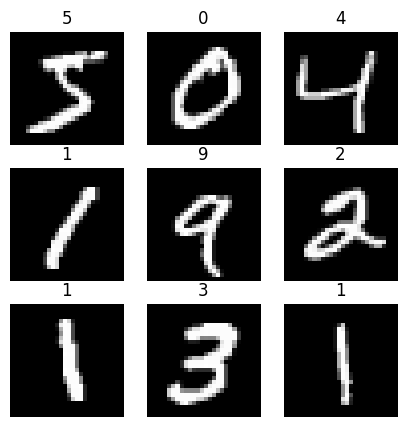

In [7]:
# Visualization of Images

plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()


In [8]:
# Normalization nd shaping images

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [9]:
# Label

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input


In [15]:
# Build CNN Model

model = Sequential([
    Input(shape=(28, 28, 1)),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])



In [16]:
# Compiling model

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [18]:
# Train Model

history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9333 - loss: 0.2292 - val_accuracy: 0.9815 - val_loss: 0.0660
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9814 - loss: 0.0614 - val_accuracy: 0.9870 - val_loss: 0.0480
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9868 - loss: 0.0430 - val_accuracy: 0.9892 - val_loss: 0.0416
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9895 - loss: 0.0335 - val_accuracy: 0.9888 - val_loss: 0.0389
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9917 - loss: 0.0276 - val_accuracy: 0.9890 - val_loss: 0.0404
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9936 - loss: 0.0205 - val_accuracy: 0.9900 - val_loss: 0.0334
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9947 - loss: 0.0165 - val_accuracy: 0.9902 - val_loss: 0.0401
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9953 - loss: 0.0138 - val_acc

In [19]:
# Model Evaluation
# Test data

test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9917 - loss: 0.0249
Test Accuracy: 0.9916999936103821


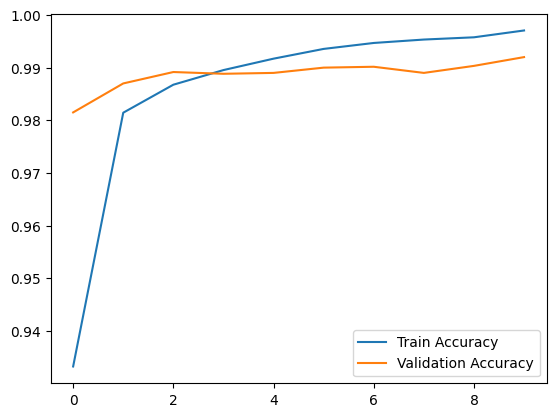

In [20]:
# Accuracy and Loss Curves 

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


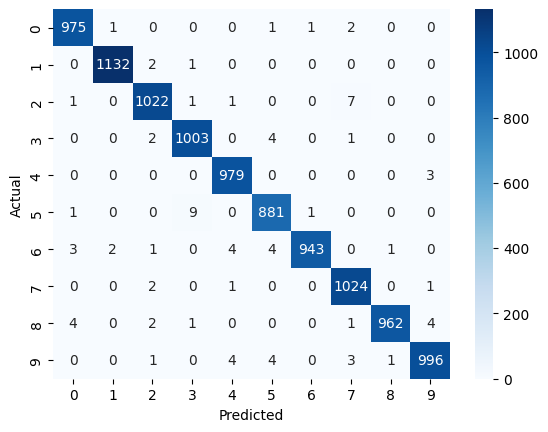

In [21]:
# Confusion Matrix 

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
# Save Model

model.save("../models/digit_cnn_model.keras")

